<a href="https://colab.research.google.com/github/JRafaQuadros91/Geopandas/blob/main/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T2-1

Desenvolva um sistema que apresente um mapa com informações da sua escolha, respondendo ao itens 1 e 2.

In [ ]:
%%bash
#Instalação das bibliotecas
pip3 install geopandas
pip3 install geobr

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for geobr: filename=geobr-0.1.9-py3-none-any.whl size=35289 sha256=acb3afa72bf3e65f7709ddf8d45dca4d4fe0f5f3b25d35a39d15239bb82df867
  Stored in directory: /root/.cache/pip/wheels/03/8e/a2/d167d4ea2259adb24d9a119ebd0e768c77d2cfbd8a15c5a734
Successfully built geobr
  Attempting uninstall: Shapely
    Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#Importação das bibliotecas
import geopandas as gpd
import geobr 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import LineString
from shapely.geometry import Point

In [ ]:
%%time
#Carrega bases estados e municipios (Pode demorar um pouco)
print('Carregando país...')
gdf_br = geobr.read_country()  #País
print('Carregando estados...')
gdf_estados = geobr.read_state() #Estados
print('Carregando municípios...')
gdf_municipios = geobr.read_municipality() #Municípios
print('Carregando mesorregiões...')
gdf_meso = geobr.read_meso_region() #Mesoregiões
print('Carregando microrregiões...')
gdf_micro = geobr.read_micro_region() #Microregiões
print('Carregando Biomas...')
gdf_biomas = geobr.read_biomes()#Biomas
print('Carregando Areas de risco de desastre...')
gdf_risco = geobr.read_disaster_risk_area()# Areas de risco de desastre.
print('Carregando Areas de conservação...')
gdf_conservacao = geobr.read_conservation_units()
print('Download das bases finalizado.')

Carregando país...
Carregando estados...
Carregando municípios...
Carregando mesorregiões...
Carregando microrregiões...
Carregando Biomas...
Carregando Areas de risco de desastre...
Carregando Areas de conservação...
Download das bases finalizado.
CPU times: user 306 ms, sys: 6.83 ms, total: 313 ms
Wall time: 313 ms


## Item 1

Desenvolva uma aplicação utilizando Python e Geopandas que apresente de forma gráfica um mapa, considerando informações de sua escolha. Analise, detalhe e explique as informações apresentadas. É requerido que **ao menos um mapa** seja obtido da fonte de dados **GeoBR**. Mapas já trabalhados podem ser utilizados, porém as informações analisadas devem ser diferentes dos exemplos e exercícios já utilizados nas aulas.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


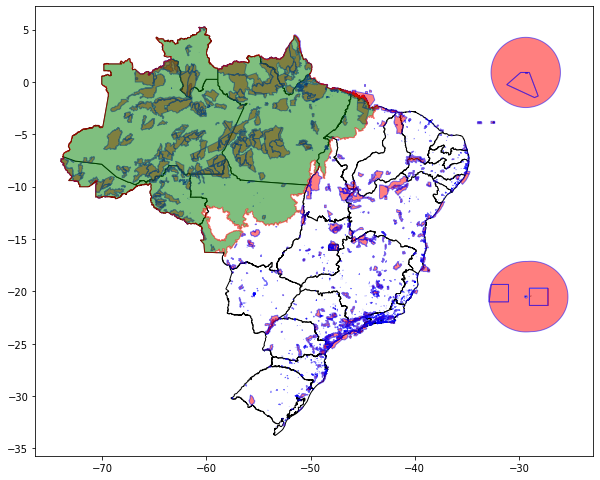

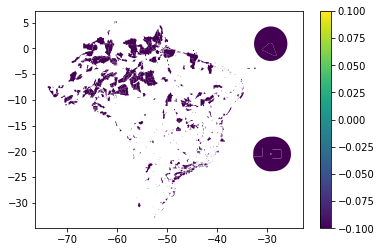

In [ ]:
biomas = {'Amazônia'} #conjunto ou lista com os valores dos biomas existentes como Amazônia
aux_biomas = gdf_biomas[gdf_biomas['name_biome'].isin(biomas)]

#conservacao = {'Amazônia'} #conjunto ou lista com os valores das areas de conservacao existentes como Amazônia
#aux_conservacao = gdf_conservacao[gdf_conservacao['name_conservation_unit'] == '%Amazônia%']


mapa = gdf_estados.plot(figsize=(10,10), color = 'w', edgecolor='k', column='name_region', legend=True, alpha = 1.0)

gdf_conservacao.plot(ax = mapa, color = 'r',edgecolor = 'b', legend = True, alpha = 0.5) # Mapa com as regioes de conservação ambiental no brasil


aux_biomas.plot(ax = mapa, color = 'g',edgecolor = 'r', legend = True, alpha = 0.5)


gdf_conservacao['n_reservas'] = 0 
aux_reservas = gdf_conservacao['n_reservas'].copy() 
for p in gdf_biomas['geometry'].squeeze(): 
   aux_reservas[gdf_conservacao.contains(p)]+=1 
gdf_conservacao['n_reservas'] = aux_reservas 
gdf_conservacao.plot(column='n_reservas', legend=True) 


#nesse exemplo estou mostrando o mapa do brasil , a região do mapa que possui o bioma classificado como "Amazônia" e também as áreas de conservação ambiental



,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry,Biomas,n_reservas
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906...",0,0
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640...",0,0
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632...",0,0
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ...",0,0
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208...",0,0


## Item 2

Desenvolva uma aplicação utilizando Python e Geopandas que apresente de forma gráfica um mapa, considerando informações de sua escolha. Analise, detalhe e explique as informações apresentadas. É requerido que **ao menos um mapa** seja obtido de fonte de dados **diferente** da GeoBR. Mapas já trabalhados podem ser utilizados, porém as informações analisadas devem ser diferentes dos exemplos e exercícios já utilizados nas aulas.

In [ ]:
%%time
#Carrega bases estados e municipios (Pode demorar um pouco)
print('Carregando país...')
gdf_br = geobr.read_country()  #País
print('Carregando estados...')
gdf_estados = geobr.read_state() #Estados
print('Carregando municípios...')
gdf_municipios = geobr.read_municipality() #Municípios
print('Carregando mesorregiões...')
gdf_meso = geobr.read_meso_region() #Mesoregiões
print('Carregando microrregiões...')
gdf_micro = geobr.read_micro_region() #Microregiões
print('Download das bases finalizado.')
gdf_biomas = geobr.read_biomes()#Biomas
print('Carregando Areas de risco de desastre...')
gdf_risco = geobr.read_disaster_risk_area()# Areas de risco de desastre.
print('Carregando Areas de conservação...')
gdf_conservacao = geobr.read_conservation_units()
print('Download das bases finalizado.')

Carregando país...
Carregando estados...
Carregando municípios...
Carregando mesorregiões...
Carregando microrregiões...
Download das bases finalizado.
Carregando Areas de risco de desastre...
Carregando Areas de conservação...
Download das bases finalizado.
CPU times: user 324 ms, sys: 5.35 ms, total: 329 ms
Wall time: 326 ms


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
database_path = '/content/drive/Shareddrives/Tcc2021Rafael/trabsgeopandas/RJ' #caminho da base de dados
df = gpd.read_file(database_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


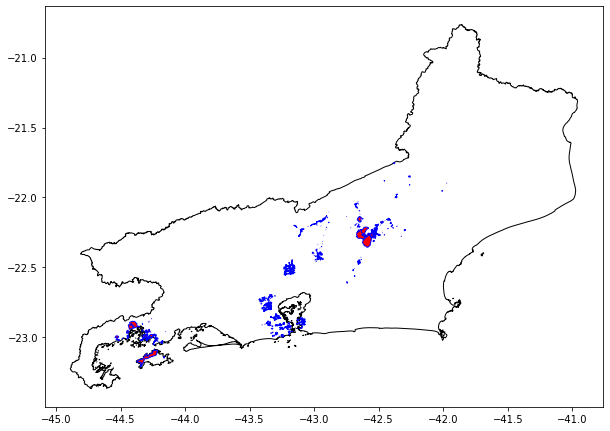

In [ ]:
df.head()

#df.plot(color='white', edgecolor='black', figsize=(15,8))



mapa = df.plot(figsize=(10,10), color = 'w', edgecolor='k', column='name_region', legend=True, alpha = 1.0)
risco_rj = gdf_risco[gdf_risco['abbrev_state']=='RJ']
risco_rj.plot(ax = mapa, color = 'r',edgecolor = 'b', legend = True)

#Mostrando nesse exemplo as areas de risco de desastres naturais que se encontram no estado do Rio de Janeiro, mapa retirado do link geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/)
# salvo no drive , aberto e utilizado como mapa base para plotar.






